In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

Create population distribution

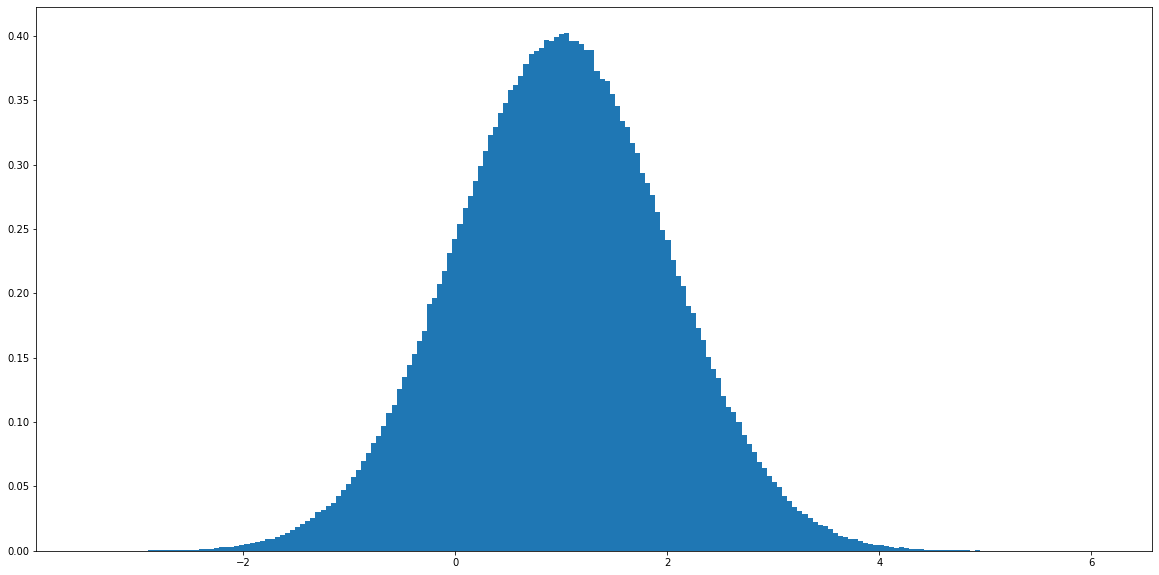

In [2]:
mu, sigma = 1, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000000)

plt.figure(figsize=(20,10))
plt.hist(s, 200, density=True)
plt.show()

## Chebyshev's Inequality

The therom states that, for wide class of probability distribution, no more than a certain amount of values can be a certain distance from the mean.<br/>
For example, probability that a distance from mean is far more than 3 standard deviation is less than one over nine.<br/>
To illustrate the therom, I sample 10000 sample from population and count a sample than k standard deviation far from mean.<br/>
I use many k, plot the probability and repeat 5 times. We can see that the probability decreases as the k factor increases every time.

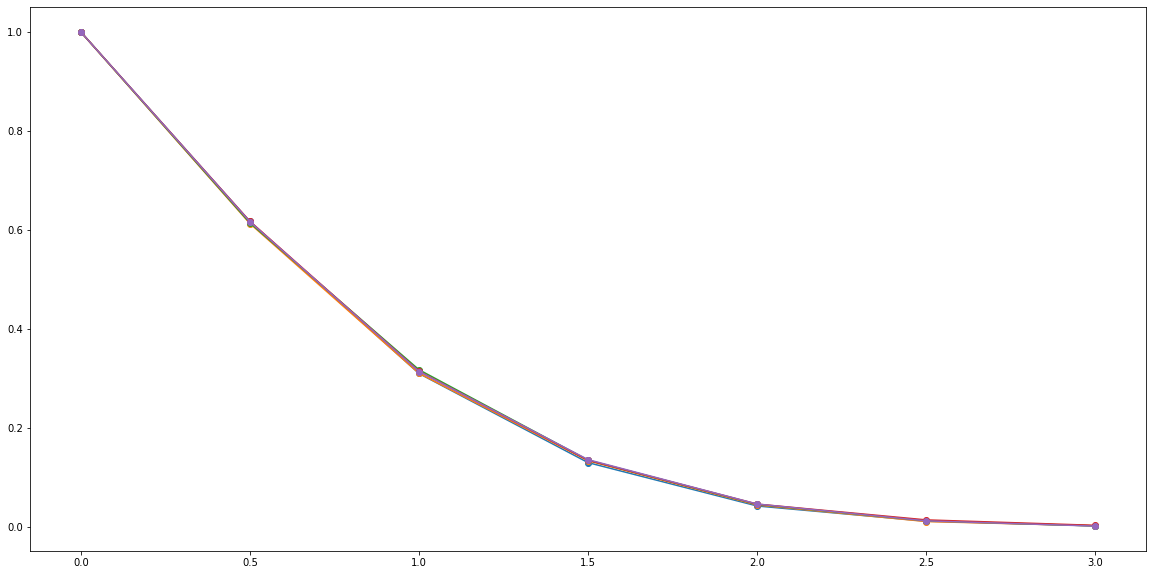

In [3]:
# not using formula, use graph to prove
# run many time to make sure
ts = 5
# set k
ks = [0,0.5,1,1.5,2,2.5,3]
# set figure size.
plt.figure(figsize=(20,10))
# for each time
for t in range(0,ts):
    # sample 10000 sample
    rs = random.choices(s, k=10000)
    # count list
    clist = []
    # for each k
    for k in ks: 
        # start count
        c = 0
        # for each data sample
        for i in rs:
            # count if far from mean in k standard deviation
            if abs(i - mu) > k * sigma :
                c += 1
        clist.append(c/10000)

    # plot each probability.
    plt.plot(ks,clist, marker='o')
# show plot.
plt.show()

## Weak Law of Large Numbers
edit sample size to number of trial.<br />
When the sample size is large, the sample mean will converge into the expected value.<br />
I sample from population with various sample sizes, from 100 to 8100, 50 times.<br />
each sample I collect mean, so I have 50 mean of each sample size.<br />
Then compare distribution of each sample size.<br />
We can see that the varience of large sample sizes is less than small sample sizes.<br />
Well, in theory, if the sample size goes to infinity, the varience will be zero and sample mean will be expected value.<br />

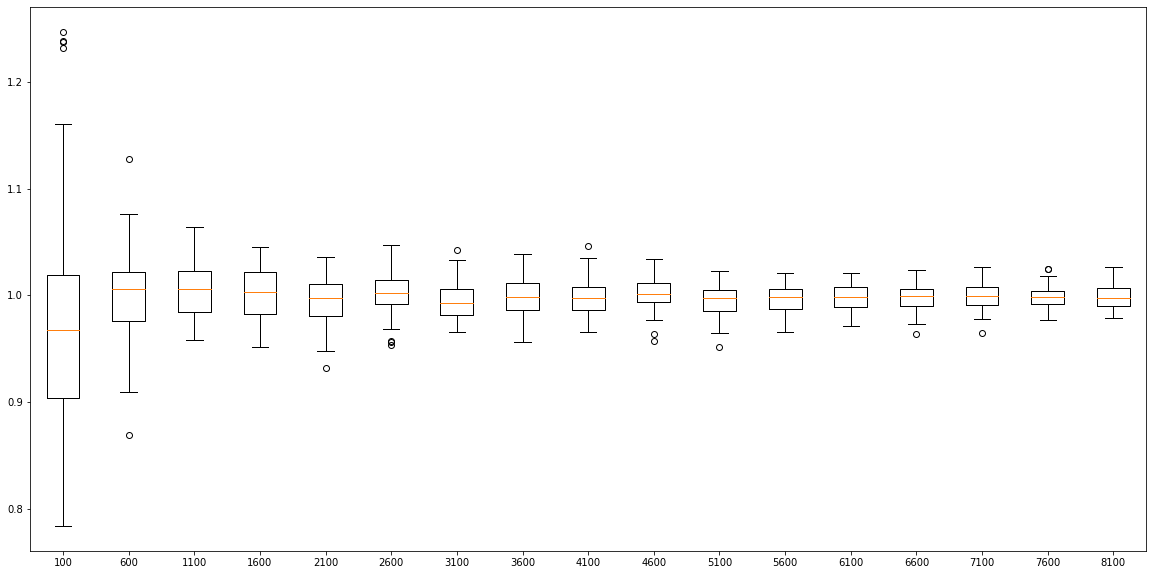

In [4]:
## weak law of large number.
# reference link : https://en.wikipedia.org/wiki/Law_of_large_numbers.

samplemeanlist = [] # list of sample mean.
l = [] # list of smaple size, for x-axis of box plots.
numberofsample = 50 # number of sample in each sample size.
    
# set sample size (i) between 100 to 8100, step by 500.
for i in range(100,8101,500):
    # set x-axis
    l.append(i)
    # list of mean of each sample.
    ml = []
    # sample 50 time.
    for n in range(0,numberofsample):
        # random pick from population with sample size = i.
        rs = random.choices(s, k=i)
        # calculate the mean of each sample and save it in list of mean.
        ml.append(sum(rs)/i)  
    
    # save the 50 sample mean in samplemeanlist for box plots.
    samplemeanlist.append(ml)
            
# set figure size.
plt.figure(figsize=(20,10))
# plot box plots of each sample mean.
plt.boxplot(samplemeanlist,labels = l)
# show plot.
plt.show()

## Central Limit Theorem

If we sample groups of ramdom variables that are independent and identically distributed and collect their mean,<br/>
the distribution of sample mean will be normal distribution. Even if the population distribution is not a normal distribution.<br/>
We can see that when the number of sampling increase the distribution of sample mean converge to normal distribution,<br/>
even though the population has gamma distribution.

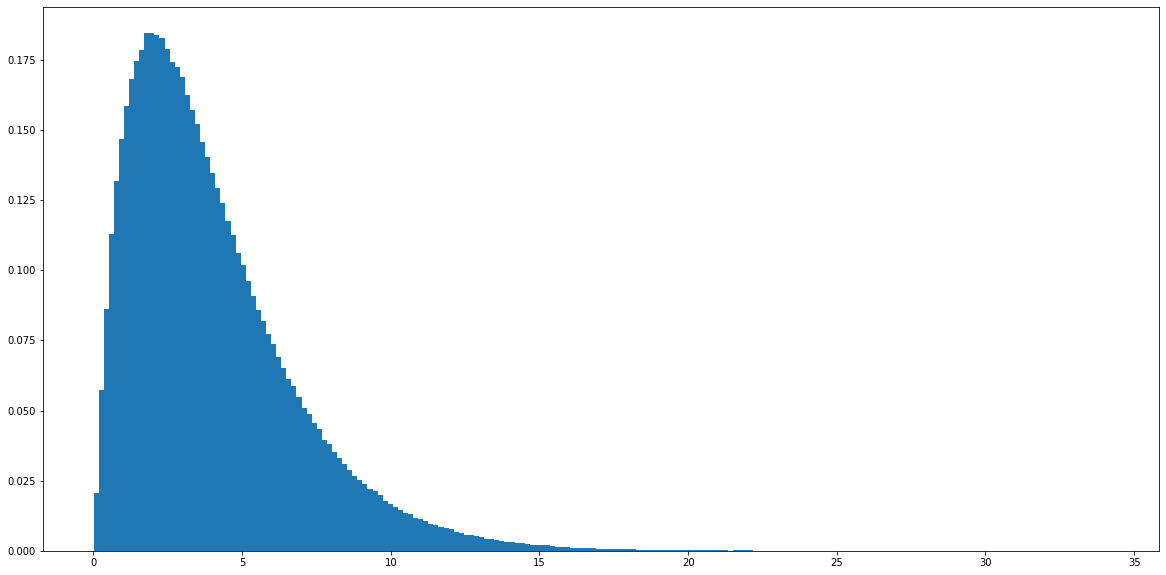

In [5]:
## Central limit theorom
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
plt.figure(figsize=(20,10))
plt.hist(s, 200, density=True)
plt.show()

In [6]:
## sample from population and stardardize
# sample 5000 at a time and sum
meansample = []
# number of sample
numofsample = [1000,2500,5000,10000,25000,50000]
# sample size
samplesize = 500
# for standardize part
lastsam = []
# for each number of sampling (1000 to 50000)
for i in numofsample:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(s, k=samplesize)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
        # collect sample for standardize part
        if i == numofsample[len(numofsample)-1]:
            lastsam = rc
    meansample.append(eachmeansample)

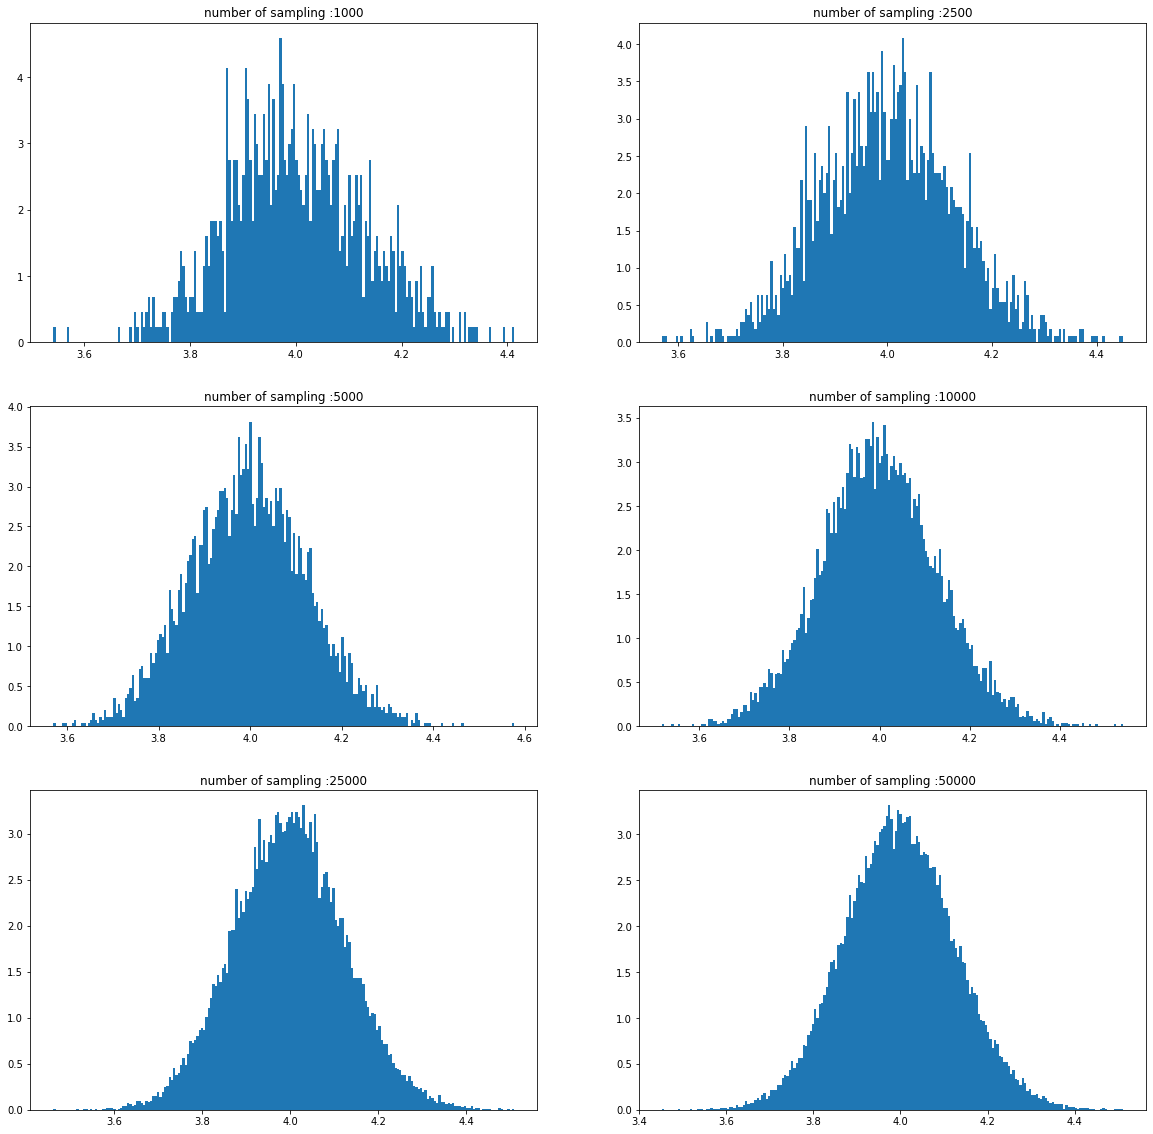

In [7]:
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,20))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="number of sampling :" + str(numofsample[n]))
        n += 1

## Standardize the Sample Mean

We can change sample mean distribution into standard normal distribution by subtracting sample mean with expected value and dividing standard deviation with its standard deviation.

In [9]:
## standardize part
zn = []
# use last sample
sm = meansample[len(meansample)-1]
# calculate start deviation
std = np.std(sm)
# set population mean
mean = 4
# for each sample subtract by devide
for i in sm:
    zn.append((i-mean)/std)

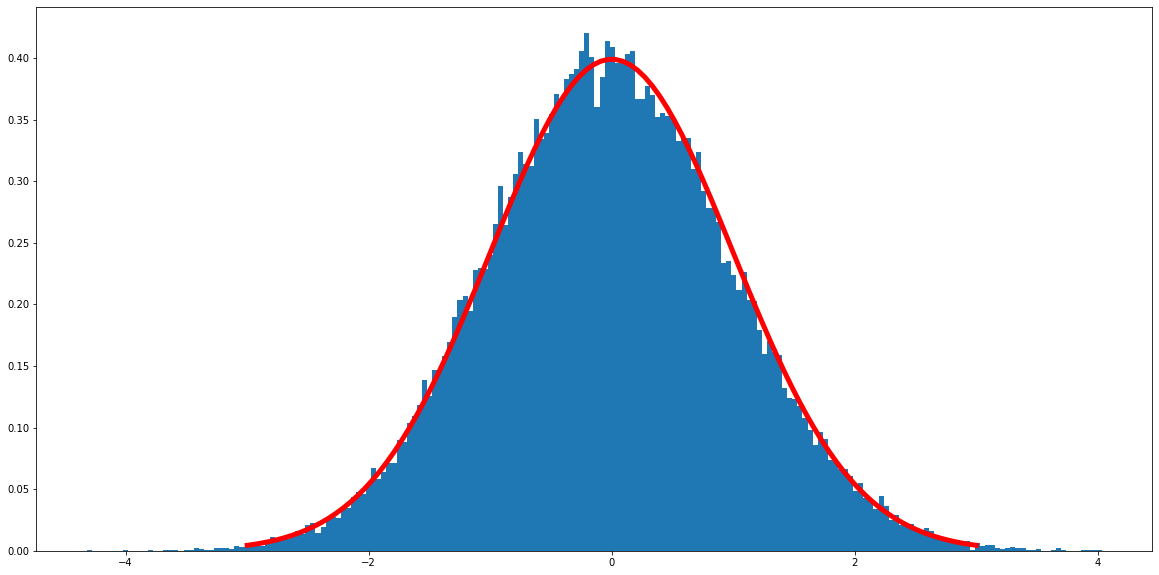

In [10]:
plt.figure(figsize=(20,10))
plt.hist(zn, 200, density=True)
# compare with standard normal disrtibution
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# draw standard normal disrtibution line
plt.plot(x, stats.norm.pdf(x, mu, sigma),linewidth = 5, color='red')
plt.show()

## Convergence of the Sample Mean

Suppose we sample n data each of which is independent and identically distributed with finite mean and variance, <br/>the expected value of the sample will be sum of each expected value divided by n.<br/>
And the standard deviation of sample will be stardard deviation of each data divided by squre root of n. 

In [12]:
## expect value of sample 
# expected value of sample equal to expect value of population
sample = meansample[0]
print("expected value of sample:", np.mean(sample))
print("expected value of population:", shape*scale)
# standard deviation of sample equl to standard deviation of population divided by squre root of n
print("standard deviation of sample:", np.std(sample))
print("standard deviation of population:", scale*np.sqrt(shape)/np.sqrt(500))

expected value of sample: 3.999846484663925
expected value of population: 4.0
standard deviation of sample: 0.1294570485100462
standard deviation of population: 0.12649110640673517


It mgiht be hard to understand ....

If we plug in the sample expected value and standard deviation in Chebyshev's Inequality,<br/>
and set the sample size to infinity, a difference between sample mean and expected value become zero.<br/>
I plot the difference between sample mean and expected value, using sample size between 10 to 20,000, step by 20.

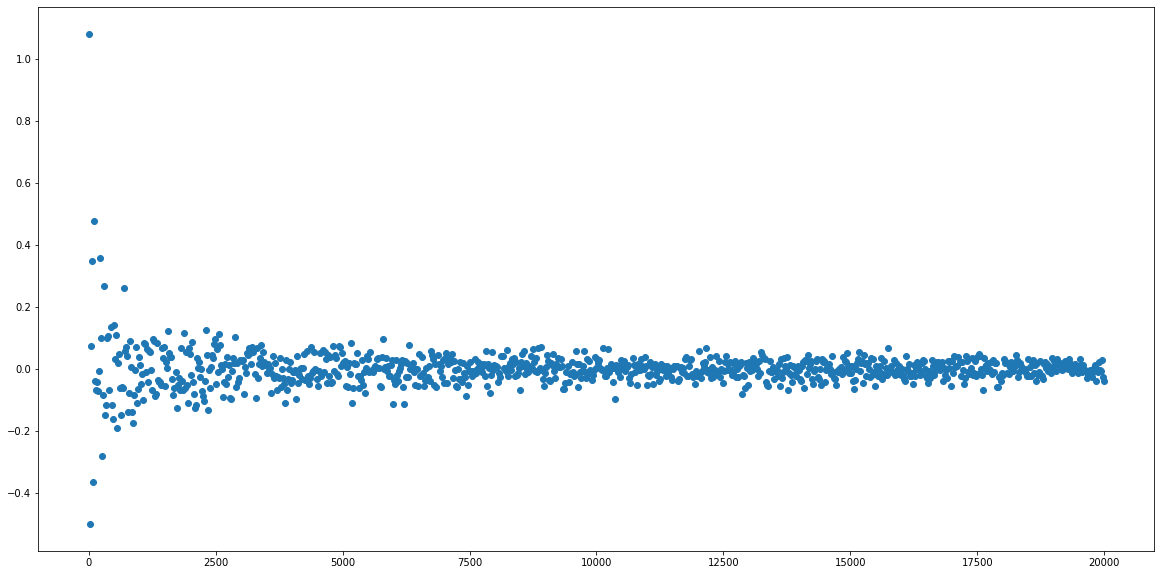

In [13]:
## show as the sample size increase probability is droping
# set expected values and standard deviation of population
mu = shape*scale # mean and standard deviation
# sample size
samplesize = []
# set figure size.
plt.figure(figsize=(20,10))
# collect difference between sample mean and mu
diflist = []
# for each sample size
for n in range(10,20000,20): 
    # sample 10000 sample
    rs = random.choices(s, k=n)
    # start count
    c = 0
    # calculate mean
    mean = np.mean(rs)
    # collect difference between sample mean and mu
    diflist.append(mean-mu)
    samplesize.append(n)

# plot each probability.
plt.scatter(samplesize,diflist, marker='o')
# show plot.
plt.show()

We can see that the differnce of sample mean and expected value decrease and converge to zero as the sample size increase.<br/>

Since we cannot have infinite sample size, we can use the Chebyshev's Inequality to calculate the error of sample mean in perticular sample size.<br/>
In other words, we can calculate sample size that have a difference between sample mean and expected values with in an error.

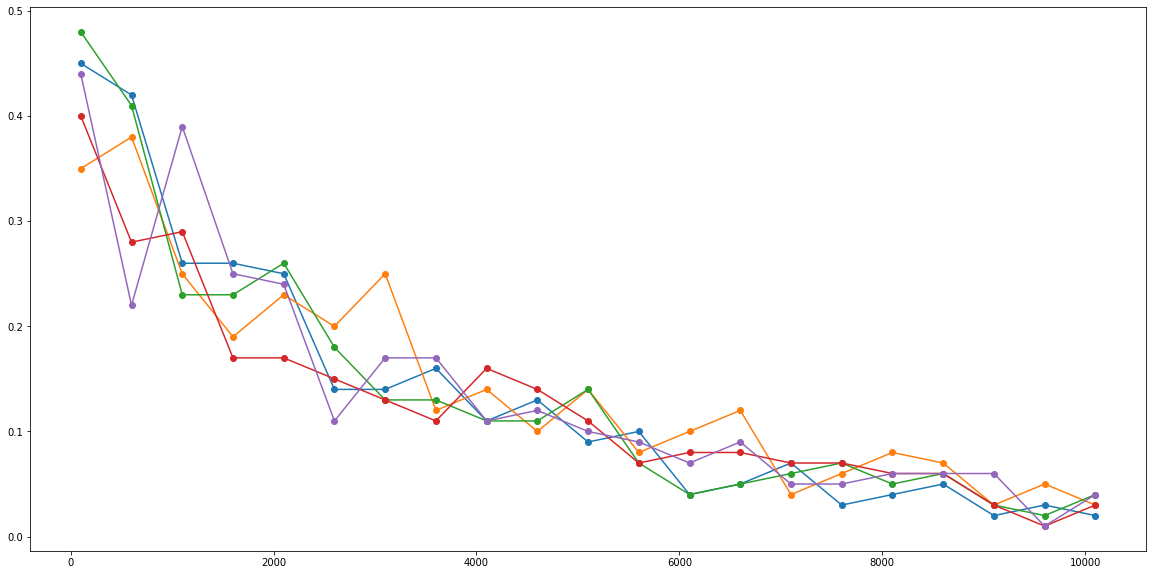

In [14]:
# set figure size.
plt.figure(figsize=(20,10))
# collect difference between sample mean and mu
epsilon = 0.05
# run many time to make sure
ts = 5
# for each time
for t in range(0,ts):
    proberror = []
    # sample size
    samplesize = []
    # for each sample size
    for n in range(100,10101,500): 
        # start count
        c = 0
        for i in range(0,100):
            # sample 10000 sample
            rs = random.choices(s, k=n)
            # calculate mean
            mean = np.mean(rs)
            if mean - mu > epsilon:
                c += 1
        # collect difference between sample mean and mu
        proberror.append(c/100)
        samplesize.append(n)
    # plot each sample mean.
    plt.plot(samplesize,proberror, marker='o')

# show plot.
plt.show()

## Confidence Interval

If we use what we have in convergence of sample mean, we can change the formula into other from.<br/>

Because the expectation of values is a number not a veriabel, the number cannot have probability.
We can interpetate the formula as the probability that the interval will have the expected value is a certain probability.<br/>
In other words, if we create an interval n times, we confidence that in m times the interval will contain the expected value.<br/>
To illustrate this, I ...

number of interval that cover the expected values: 96


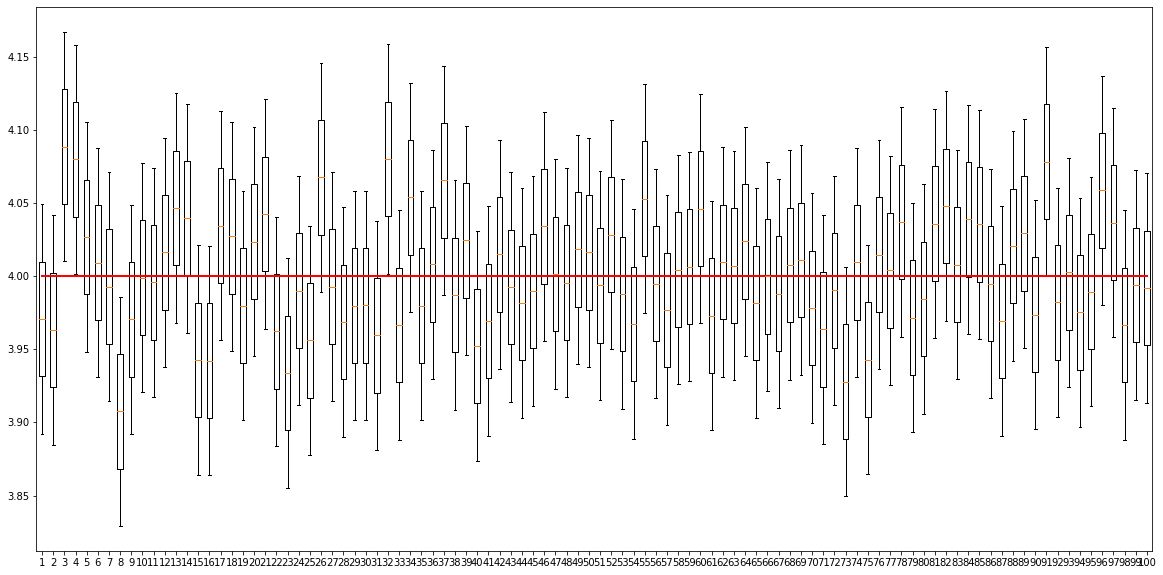

In [15]:
# collect difference between sample mean and mu
mu = shape*scale # mean and standard deviation
sigma = scale*np.sqrt(shape)
intervallist = []
k = 1.96
# sample size
samplesize = 5000
# start count
c = 0
for i in range(0,100):
    # sample 5000 sample
    rs = random.choices(s, k=samplesize)
    # calculate mean
    mean = np.mean(rs)
    upbound = mean + k*sigma/np.sqrt(samplesize)
    lowbound = mean - k*sigma/np.sqrt(samplesize)
    # collect difference between sample mean and mu
    intervallist.append([lowbound,mean,upbound])
    if upbound >= mu and lowbound <= mu:
        c += 1
        
print("number of interval that cover the expected values:", c)
# set figure size.
plt.figure(figsize=(20,10))
# plot box plots of each sample mean.
plt.boxplot(intervallist)
plt.plot([1, 100],[mu,mu], 'k-', lw=2, color='red')
# show plot.
plt.show()